In [1]:
from fastbook import *
from fastai.vision.widgets import *

In [12]:
image_path = Path("train") #Path to training images
def is_com3d2(x): return x[:2] == "c_" #f(str) -> bool: returns true if the label string begins with 'c_'
dls = ImageDataLoaders.from_name_func(
    path=Path(),fnames=get_image_files(image_path), valid_pct=0.2, seed=69,
    label_func=is_com3d2, item_tfms=Resize(224),num_workers=0)#Remove num_workers if you're not running on Windows, it's there because Windows can't do parallel
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.018316,0.419597,0.167391,03:01


epoch,train_loss,valid_loss,error_rate,time
0,0.497458,0.412365,0.147826,03:08
1,0.332017,0.474346,0.115217,03:07
2,0.196466,0.188877,0.019565,03:09
3,0.130489,0.188791,0.017391,03:07
4,0.085356,0.168682,0.015217,03:06


In [3]:
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

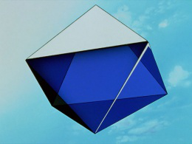

In [30]:
img = PILImage.create(uploader.data[0])
img.to_thumb(192)

In [31]:
is_true,_,probs = learn.predict(img)
is_true = is_true == 'True' #converts from fastai.data.transforms.Category to boolean
print(f"Is this a com3d2 image?: {is_true}.")
print(f"with prob: {probs[1 if bool(is_true) else 0].item():.4f}.")

Is this a com3d2 image?: False.
with prob: 0.9998.


In [15]:
learn.export("com3d2_model.pkl")